## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Dylan Karman
Part Time
Tuesday, April 21
Eli Thomas

In [1503]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd #For data exploration
#These next few packages are for statistical computation and model building
import numpy as np
# import sklearn
import sklearn
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from statsmodels.formula.api import ols
#Seaborn and matplotlib are for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
#This line of code is so the visualizations will show in the notebook
%matplotlib inline 


#importing the data set 
df = pd.read_csv('kc_house_data.csv')

# Looking Through the Data Set

In [1504]:
#First five rows of the data set to see if the import worked.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1505]:
#Changing the date format to only have the year it was purchased and not the month or day too.
df['date'] = pd.to_datetime(df['date'])
df['date'] = df.date.dt.year
df.head()

#This is not necessary. I did this to practice.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1506]:
#setting the index as the date of purchase.
df = df.set_index('date')
df.head()

#This is not necessary. I did this to practice.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2014,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2015,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2014,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
2015,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1507]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1508]:
#we will check to see if there are any missing values as well as the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 2014 to 2014
Data columns (total 20 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.5+ MB


# Cleaning the Data Set

In [1509]:
#sqft_basement and date is an object. Why? 
#some of the data is missing.

In [1510]:
#check for null values.
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1511]:
#waterfront, view, and yr_renovated all have missing values. We need to replace these or drop them.

In [1512]:
#we will make the assumption that 0.0 == no waterfront, and 1.0 == waterfront
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [1513]:
#The amount of missing data equates to 2376/21579 = ~11% so not enough for me to want to drop it. 
#I will assume that these houses do not have a waterfront.
df['waterfront'] = df['waterfront'].fillna(0)

In [1514]:
print(df['waterfront'].value_counts())

0.0    21451
1.0      146
Name: waterfront, dtype: int64


In [1515]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [1516]:
#we will do the same for view because the perentage of data missing is very small.
#Because the description is very vague for this column, I will change the values to, 0 == not viewed, and 1 == viewed
df['view'] = df['view'].apply(lambda x: 0 if x <1 else 1)

In [1517]:
df['view'].value_counts()

0    19422
1     2175
Name: view, dtype: int64

In [1518]:
#checking to see the values
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [1519]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x <= 0 else 1)
df['yr_renovated'].value_counts()

0    17011
1     4586
Name: yr_renovated, dtype: int64

In [1520]:
#check for null (NaN) values
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [1521]:
#replace '?' values in sqft_basement.
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3260.0        1
906.0         1
143.0         1
274.0         1
1770.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [1522]:
#because the '?' is such a small amount of data, we will replace it with the column mean.
#replacing missing data in sqft_basement with column mean
sqft_basement_numerical = df.sqft_basement[df.sqft_basement != '?']
sqft_basement_numerical = sqft_basement_numerical.astype(float)
sqft_basement_numerical_mean = round(sqft_basement_numerical.mean(),1)
df['sqft_basement'] = (df['sqft_basement'].map(lambda x: sqft_basement_numerical_mean if x == '?' else x)).astype(float)
#matt spar

In [1523]:
#double check to see if the '?' was replaced.
df['sqft_basement'].value_counts()

0.0       12826
291.9       454
600.0       217
500.0       209
700.0       208
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [1524]:
#Great, now all of the missing/misc. data is taken care of and we can continue the process.

# Data Normalization

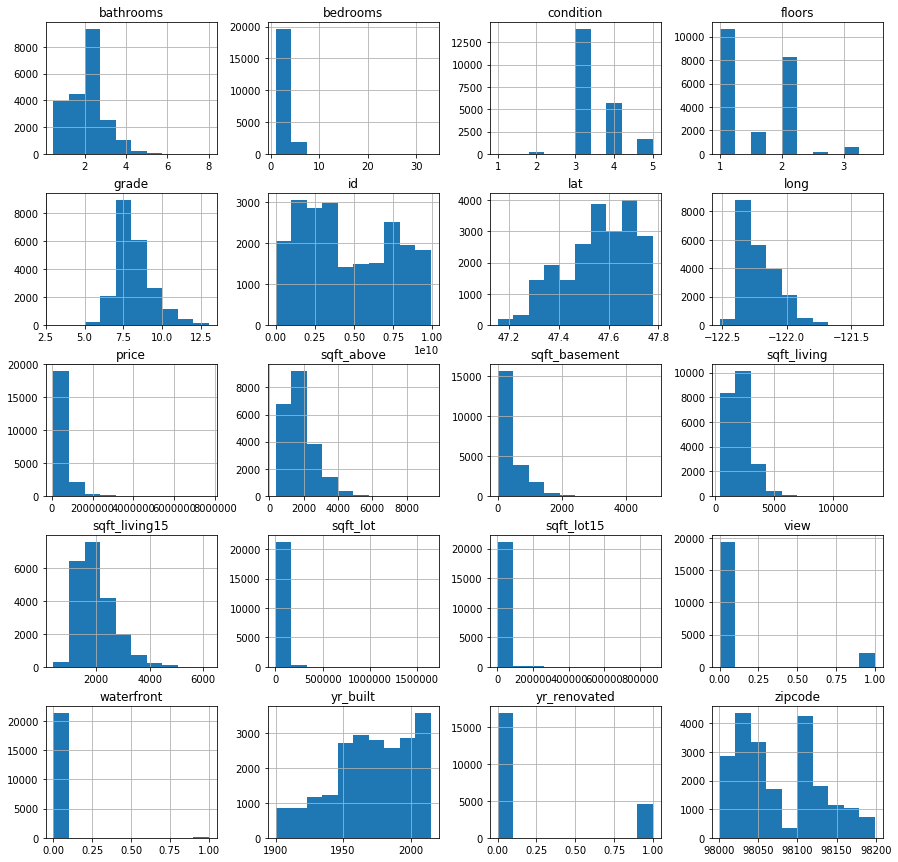

In [1525]:
#now we will check to see if the data is normally distributed.
df.hist(figsize=(15,15));

In [1526]:
#It does not look like the above graphs are normally distributed. We will need to fix this before we can proceed.
#It is quite easy to see that some of the data has some pretty huge outliers that will negatively affect our data. 

In [1527]:
# normalizing our data
df['bathrooms'] = np.log(df['bathrooms'])
df['bedrooms'] = np.log(df['bedrooms'])
df['condition'] = np.log(df['condition'])
df['floors'] = np.log(df['floors'])
df['grade'] = np.log(df['grade'])
df['lat'] = np.sqrt(df['lat'])
df['price'] = np.log(df['price'])
df['sqft_above'] = np.log(df['sqft_above'])
df['sqft_living'] = np.log(df['sqft_living'])
df['sqft_living15'] = np.log(df['sqft_living15'])
df['sqft_lot'] = np.log(df['sqft_lot'])
df['view'] = np.sqrt(df['view'])
df['sqft_basement'] = np.sqrt(df['sqft_basement'])
df['waterfront'] = np.sqrt(df['waterfront'])
df['sqft_lot15'] = np.log(df['sqft_lot15'])
df['yr_built'] = np.log(df['yr_built'])
df['zipcode'] = np.log(df['zipcode'])
df['yr_renovated'] = np.sqrt(df['yr_renovated'])
df['long'] = (-1)*np.sqrt(np.sqrt((-1)*df['long']))
df['id'] = np.log(df['id'])

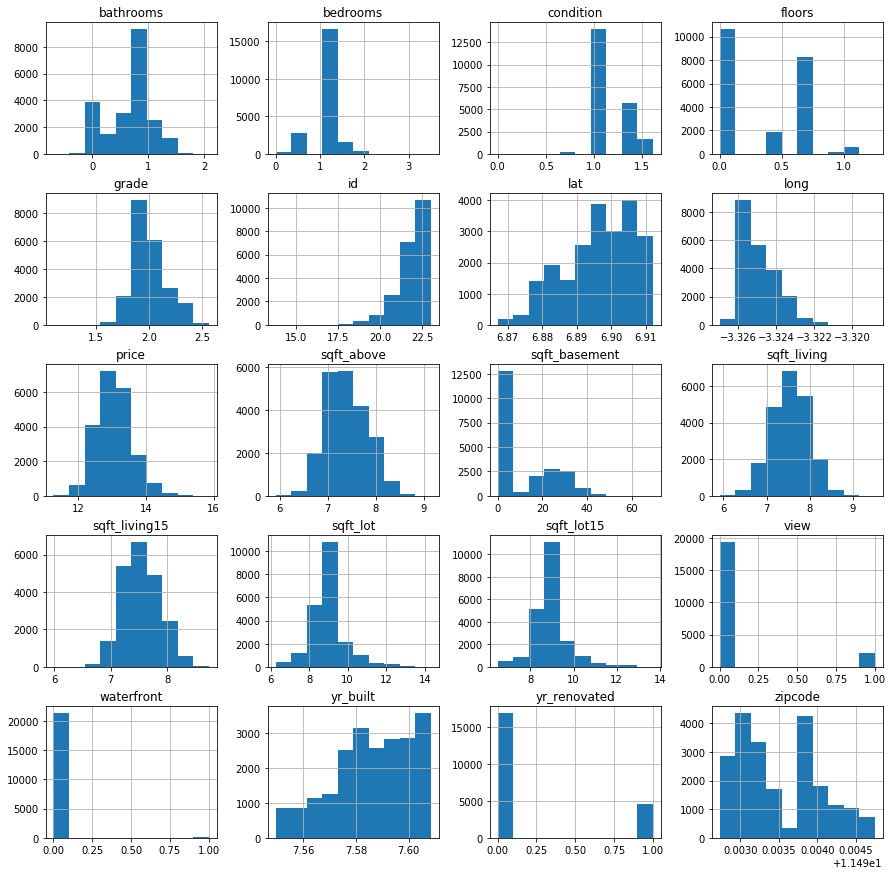

In [1528]:
#plotting normalized data.
df.hist(figsize=(15,15));

# Correlations Between the Data and Price.

In [1529]:
# dropping the 'id' column because it does not contain needed data
df.drop(['id'], axis = 1, inplace = True)

In [1530]:
# checking to see if the index is correct.
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,
2014,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,0.0,0.0,1.098612,1.945910,7.073270,0.000000,7.578145,0.0,11.494537,6.892837,-3.325205,7.200425,8.639411
2014,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,0.0,0.0,1.098612,1.945910,7.682482,20.000000,7.576097,1.0,11.493997,6.908039,-3.325627,7.432484,8.941022
2015,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,0.0,0.0,1.098612,1.791759,6.646391,0.000000,7.566828,1.0,11.493008,6.909262,-3.325042,7.908387,8.994917
2014,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,0.0,0.0,1.609438,1.945910,6.956545,30.166206,7.583248,0.0,11.494110,6.893533,-3.326129,7.215240,8.517193
2015,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,0.0,0.0,1.098612,2.079442,7.426549,0.000000,7.594381,0.0,11.493478,6.900493,-3.323763,7.495542,8.923058


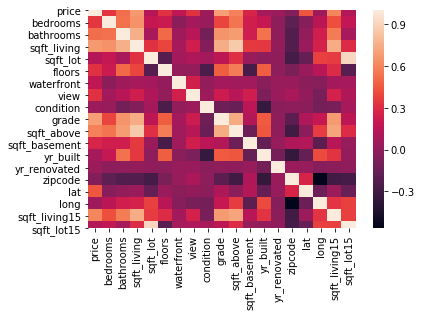

In [1531]:
#Visualizing the correlation between the features and sales price, as well as features correlated amongst themselves.
sns.heatmap(df.corr())

In [1532]:
#show the correlations in a numerical way. Using the graph BELOW makes the heat map ABOVE easier to read.
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.342850,0.520278,0.674802,0.138261,0.322991,0.170720,0.325831,0.043200,0.693837,0.586013,0.275803,0.078987,0.044384,-0.038757,0.448985,0.050836,0.607154,0.123710
bedrooms,0.342850,1.000000,0.534008,0.648121,0.195969,0.213203,-0.008360,0.071556,0.033579,0.394210,0.546713,0.239548,0.194530,-0.006340,-0.179881,-0.026781,0.156440,0.425690,0.175649
bathrooms,0.520278,0.534008,1.000000,0.760764,0.084877,0.510644,0.047165,0.149371,-0.104238,0.656387,0.683889,0.232049,0.532918,0.003112,-0.227629,0.011308,0.241419,0.570469,0.079120
sqft_living,0.674802,0.648121,0.760764,1.000000,0.325983,0.393568,0.078900,0.236332,-0.040387,0.744356,0.864979,0.354466,0.348973,0.010317,-0.222133,0.038851,0.257110,0.746836,0.303058
sqft_lot,0.138261,0.195969,0.084877,0.325983,1.000000,-0.211802,0.072340,0.111424,0.072511,0.163980,0.318663,0.035168,-0.004421,0.000917,-0.281727,-0.149288,0.376168,0.363743,0.918665
floors,0.322991,0.213203,0.510644,0.393568,-0.211802,1.000000,0.021369,0.016108,-0.252537,0.472488,0.578054,-0.269314,0.471533,-0.004257,-0.071104,0.038561,0.146872,0.300459,-0.203229
waterfront,0.170720,-0.008360,0.047165,0.078900,0.072340,0.021369,1.000000,0.246530,0.014623,0.073448,0.059125,0.062664,-0.024359,0.031776,0.028918,-0.012134,-0.037614,0.076503,0.081562
view,0.325831,0.071556,0.149371,0.236332,0.111424,0.016108,0.246530,1.000000,0.046118,0.221432,0.143575,0.242169,-0.063077,0.037302,0.090928,0.007360,-0.087191,0.258047,0.108178
condition,0.043200,0.033579,-0.104238,-0.040387,0.072511,-0.252537,0.014623,0.046118,1.000000,-0.129918,-0.139490,0.161365,-0.339294,-0.025824,-0.005235,-0.017301,-0.098559,-0.081771,0.081134
grade,0.693837,0.394210,0.656387,0.744356,0.163980,0.472488,0.073448,0.221432,-0.129918,1.000000,0.738583,0.120556,0.462017,-0.000513,-0.186805,0.115739,0.196168,0.681776,0.165268


# Linear Regression and Train/Test Split

In [1533]:
# Linear regression is fitting a line for the best fit
linreg = LinearRegression(fit_intercept=True)
selector = RFE(linreg, n_features_to_select=19)
selector = selector.fit(X_train, y_train)
linreg2 = linreg.fit(X_train_2, y_train_2)

In [1534]:
#Training our model with 80% of the data and testing the modeal with 20% of the data
y_hat_train = selector.predict(X_train)
y_hat_test = selector.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

y_hat_train2 = selector.predict(X_train_2)
y_hat_test2 = selector.predict(X_test_2)
train_residuals = y_hat_train2 - y_train_2
test_residuals = y_hat_test2 - y_test_2

In [1535]:
#Dropping our target variable from the X axis and placing it on our Y axis as the target variable
X = df.drop(['price'], axis=1)
y = df['price']

In [1536]:
#Training our regression with 80% of our data and testing it with 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100000000)

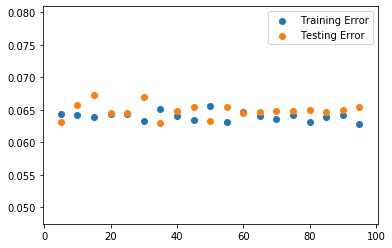

In [1537]:
# Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test 
# split sample.

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend() #learn.co

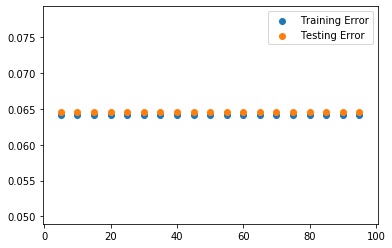

In [1538]:
#Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save 
#the average train/test error. This will help account for any particularly good/bad models that might have 
#resulted from poor/good splits in the data.

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err2 = []
    temp_test_err2 = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend() #learn.co

No handles with labels found to put in legend.


Number of data points: 20518


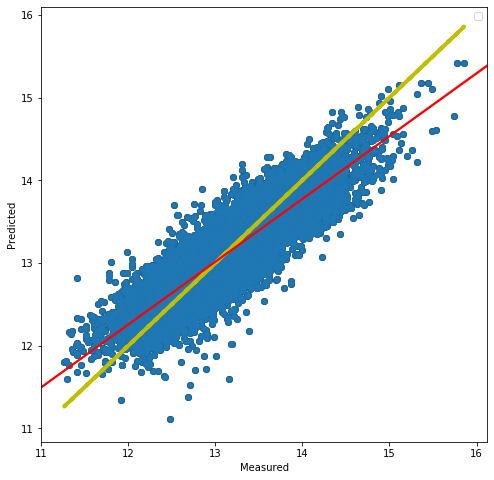

In [1555]:
prediction = linreg.predict(X_test)
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y_test, prediction, edgecolors = (0, 0, 0))
ax.plot(y_test, y_test, 'k--', lw = 4, color = 'y')
sns.regplot(x = y_test, y = prediction, ax = ax, line_kws = {"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend(); #william adams
print("Number of data points:", len(y_test))

In [1547]:
#Splitting data up further
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size=0.2, random_state=100000000)
prediction2 = linreg.predict(X_test_2)

No handles with labels found to put in legend.


nNumber of data points: 216


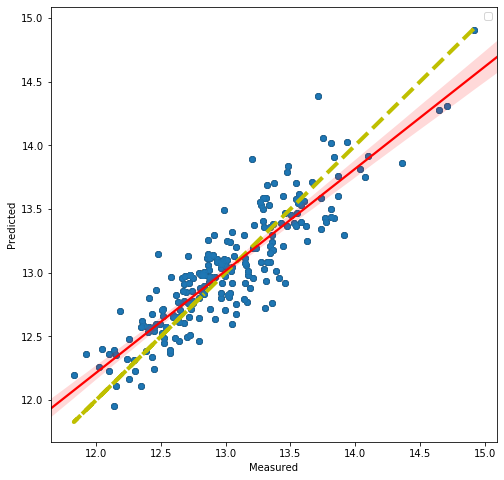

In [1556]:

#plotting our more split data
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y_test_2, prediction2, edgecolors = (0, 0, 0))
ax.plot(y_test_2, y_test_2, 'k--', lw=4, color='y')
sns.regplot(x = y_test_2, y = prediction2, ax = ax, line_kws = {"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend(); #william adams
print('nNumber of data points:', len(y_test_2))

# Calculating the RMSE (Root Mean Square Error)

In [1542]:
# Calculating the MSE

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse) #learn.co

Train Mean Squarred Error: 0.06380687463112081
Test Mean Squarred Error: 0.06513073812511552


In [1543]:
# a different way to calculate the MSE
# mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
# mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)

In [1544]:
# calculating the RMSE
# (RMSE = sqrt(MSE))
# if the test set result is SUBSTANTIALLY lower than the train set, it is a sign that future models will be bad.
# we are ok here

RMSE_train = sqrt(mean_squared_error(y_train, y_hat_train))
RMSE_test = sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root Mean Square Error', RMSE_train)
print('Test Root Mean Square Error', RMSE_test) #learn.co

Train Root Mean Square Error 0.2526002269023542
Test Root Mean Square Error 0.2552072454400845


# Testing For Our R-Squared Value

In [1559]:
# Scikitlearn’s R2 score:
sklearn.metrics.r2_score(y_test, y_hat_test) #Michael Matthews

0.7649175379287989

In [1546]:
# CONCLUSION:
# After playing around with the variables, I have determined that all of the variables have a positive 
# relationship towards the target variable. 
# I can predict with 76% accuracy the sales price of houses in KC, USA given these variables.

In [1561]:
# ---------------------

In [1560]:
# another way to calculate the r^2 score.
target = 'price'
predictor = X
pred_sum = '+'.join(predictor)
formula = target + '~' + pred_sum #william adams

In [1558]:
model = ols(formula=formula, data=df).fit()
model.summary() #william adams

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     3967.
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:32:19   Log-Likelihood:                -1017.3
No. Observations:               21597   AIC:                             2073.
Df Residuals:                   21578   BIC:                             2224.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       574.7126     44.418     12.939      0.000     487.650     661.775
bedrooms         -0.1172      0.008    -14.075      0.000      -0.134      -0.101
bathrooms         0.0954      0.008     11.810      0.000       0.080       0.111
sqft_living       0.0832      0.025      3.289      0.001       0.034       0.133
sqft_lot          0.0180      0.005      3.552      0.000       0.008       0.028
floors            0.0863      0.008     11.213      0.000       0.071       0.101
waterfront        0.5203      0.022     23.799      0.000       0.477       0.563
view              0.1649      0.006     25.611      0.000       0.152       0.178
condition         0.1975      0.010     18.843      0.000       0.177       0.218
grade             1.2531      0.021     60.976      0.000       1.213       1.293
sqft_above        0.2887      0.024     12.222      0.000       0.242       0.335
sqft_basement     0.0046      0.000     11.894      0.000       0.004       0.005
yr_built         -7.6211      0.173    -44.076      0.000      -7.960      -7.282
yr_renovated      0.0116      0.004      2.722      0.006       0.003       0.020
zipcode         -59.9532      4.095    -14.642      0.000     -67.979     -51.928
lat              18.9699      0.188    101.006      0.000      18.602      19.338
long            -14.2614      2.482     -5.746      0.000     -19.126      -9.396
sqft_living15     0.2147      0.009     24.059      0.000       0.197       0.232
sqft_lot15       -0.0405      0.005     -7.389      0.000      -0.051      -0.030
==============================================================================
Omnibus:                      518.557   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              991.088
Skew:                           0.172   Prob(JB):                    6.14e-216
Kurtosis:                       3.992   Cond. No.                     7.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""